<a href="https://colab.research.google.com/github/laxmangautam/Data-Science-with-python/blob/main/Basic_Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This unsupervised machine learning algorithm almost perfectly left in the patterns while picking off outliers, which in this case were all just faulty data points. I’ve used isolation forests on every outlier detection problem since. In this blog post, I’ll explain what an isolation forest does in layman’s terms, and I’ll include some Python / scikit-learn code for you to apply to your own analyses.

**Outliers**

First, some outlier theory. Univariate outliers are all cases in one’s data that are quite far from the mean in terms of standard deviation on a certain variable. Don’t confuse them with influential cases. Influential cases may be outliers, and vice versa, but they’re not identical. Multivariate outliers, which we are discussing in this post, are essentially cases that display a unique or divergent pattern on variables.

**Outliers may have two causes:**


*   There may be mistakes present in your data. Maybe someone filled in a faulty number or just typed 999; maybe the application generating your data contains some weird logic. You definitely want to remove these cases before analysis.
*   Some cases are quite abnormal in your data, but are valid. In this case, it’s up to the data scientist to remove them or not. If you’re for example doing a regression, those outliers may strongly influence your results (Cook’s distance), and you’ll remove them from the data. However, a clustering algorithm will just put the abnormal group of cases in a separate cluster.

What I find isolation forests to do well, is that they first start at picking off the false or bad cases, and only when those are all identified, will start on the valid, abnormal cases. This is because valid cases, however abnormal, are often still grouped together, where bad cases are truly unique. This is not true for all analyses; if a default is 999 for example, there may be many cases with that value on some variable. It’s up to the data scientist to be vigilant in those cases.

Based on this, essentially what an isolation forest does, is construct a decision tree for each data point. In each tree, each split is based on selecting a random variable, and a random value on that variable. Subsequently, data points are ranked on how little splits it took to identify them. Given that the model’s instructions were to identify X% as outliers, the top X% cases on rank score are returned.

Isolation forests perform well because they deliberately target outliers, instead of defining abnormal cases based on normal case behaviour in the data. They are also quite efficient; I’ve easily applied them on datasets containing millions of cases.

Now for the practical bit. Let’s generate some data. I generate a large sample of definite inliers, then some valid outliers, then some bad cases.


As the name suggests, isolation forests are based on random forests. I’ll dig into decision trees and random forests some other time, but here’s what you need to know; decision trees split data into classes in order to minimize prediction error. On each iteration, the tree gets to make one split on one of the included variables to removing the most entropy, or degree of uncertainty. For example, a decision tree could first split cases into younger and older people, when predicting SES. Subsequently, it could split the younger group into people with and without college degrees to remove entropy, and so on.

**Introduce random forests** large, powerful ensembles of trees, in which individual quality of each tree is diminished due to random splits, but with low prediction error due to trees outperforming other trees gaining a larger weighting in the final decision.


900
[array([48.8967812]), array([46.06045035])]
50
[array([70.13016857]), array([69.25678868])]
50
[array([41.65201874]), array([61.41959147])]
1000
[array([47.72330815]), array([49.1097592])]
[array([54.6930999]), array([54.50804742])]
[array([48.8967812]), array([46.06045035])]
                    v1                    v2
0  [40.13918081912595]  [55.092090215547834]
1  [40.28133978669487]   [52.19486784351823]
2  [42.14170680163273]   [55.62823168202855]
3  [49.16724935379124]   [47.66692005756653]
4  [55.32309101574787]  [45.843153753009666]


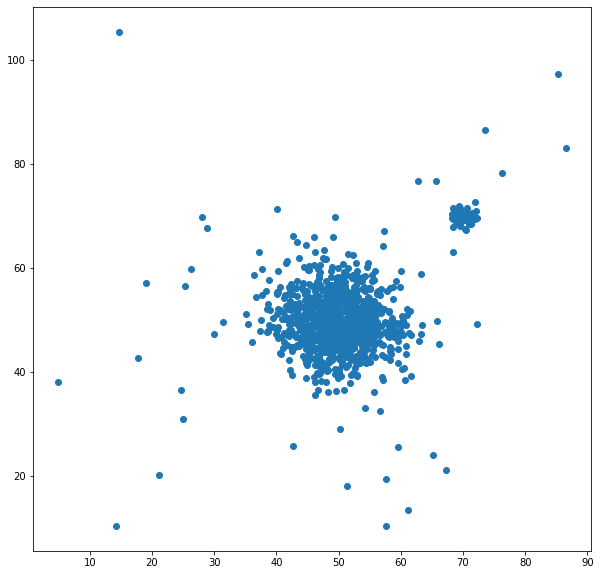

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

##first, build a simulated 2-dimensional dataset
inliers = [[np.random.normal(50, 5, 1), np.random.normal(50, 5, 1)] for i in range(900)]
outliers1 = [[np.random.normal(70, 1, 1), np.random.normal(70, 1, 1)] for i in range(50)]
outliers2 = [[np.random.normal(50, 20, 1), np.random.normal(50, 20, 1)] for i in range(50)]
print(len(inliers))
print(inliers[899])
print(len(outliers1))
print(outliers1[49])
print(len(outliers2))
print(outliers2[49])



#merge and reshape the data points
df = inliers+ outliers1 + outliers2
print(len(df))
print(df[0])
print(df[49])
print(df[899])
v1, v2 = [i[0] for i in df],[i[1] for i in df]

df = pd.DataFrame({'v1': v1, 'v2': v2})
df = df = df.sample(frac=1).reset_index(drop=True)
print(df.head(5))

##and look at the data
plt.figure(figsize = (10,10))
plt.scatter(df['v1'], df['v2'])
plt.show()

Subsequently, we’ll train an isolation forest to identify outliers and examine the results. 5% of the set were generated as outliers. However, some of these are likely to have ended up as inliers. Therefore I set the outlier identification threshold to 4%.

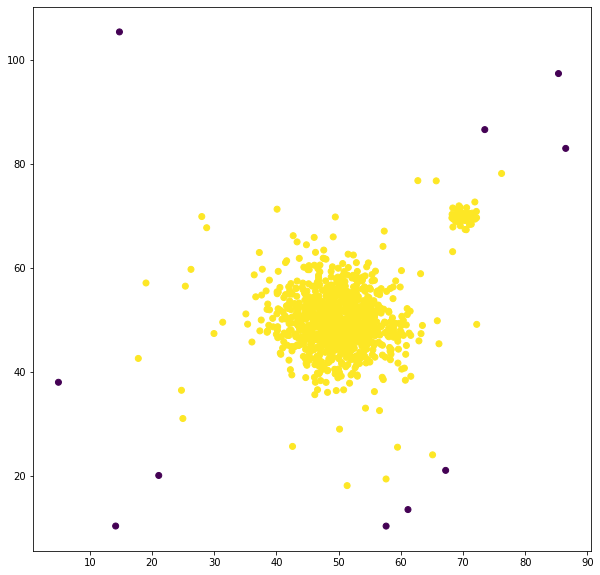

In [45]:
##apply an Isolation forest
outlier_detect = IsolationForest(n_estimators=1000, max_samples=1000, contamination=.01, max_features=df.shape[1])
outlier_detect.fit(df)
outliers_predicted = outlier_detect.predict(df)

#check the results
df['outlier'] = outliers_predicted
plt.figure(figsize = (10,10))
plt.scatter(df['v1'], df['v2'], c=df['outlier'])
plt.show()

As you see, the isolation forest nicely separates bad cases from actual data patterns, with barely any errors. If I would now want to remove the rightmost cluster as well, I could just increase my removal threshold. The next plot is the result with the threshold set to 15%. One can clearly see that it now starts picking at cases in the smaller cluster and in the periphery of the larger cluster. Keep in mind that this algorithm will always incur slight error, due to random generation of splits.

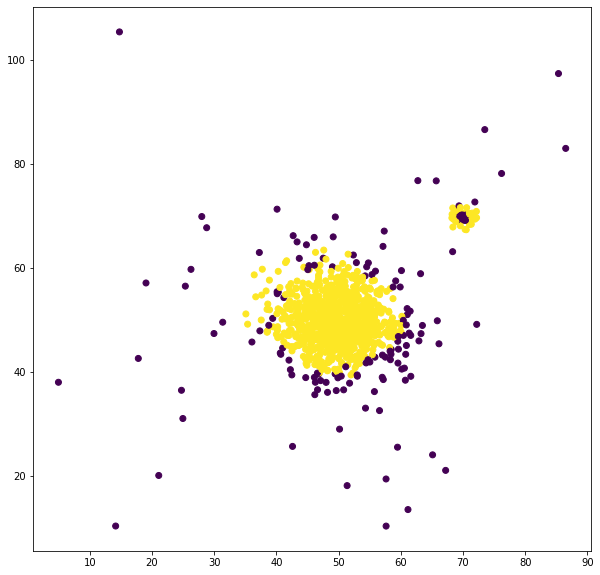

In [49]:
##apply an Isolation forest
outlier_detect = IsolationForest(n_estimators=10, max_samples=1000, contamination=.15, max_features=df.shape[1])
outlier_detect.fit(df)
outliers_predicted = outlier_detect.predict(df)

#check the results
df['outlier'] = outliers_predicted
plt.figure(figsize = (10,10))
plt.scatter(df['v1'], df['v2'], c=df['outlier'])
plt.show()

As you see, the isolation forest nicely separates bad cases from actual data patterns, with barely any errors. If I would now want to remove the rightmost cluster as well, I could just increase my removal threshold. The next plot is the result with the threshold set to **10%**. One can clearly see that it now starts picking at cases in the smaller cluster and in the periphery of the larger cluster. Keep in mind that this algorithm will always incur slight error, due to random generation of splits.

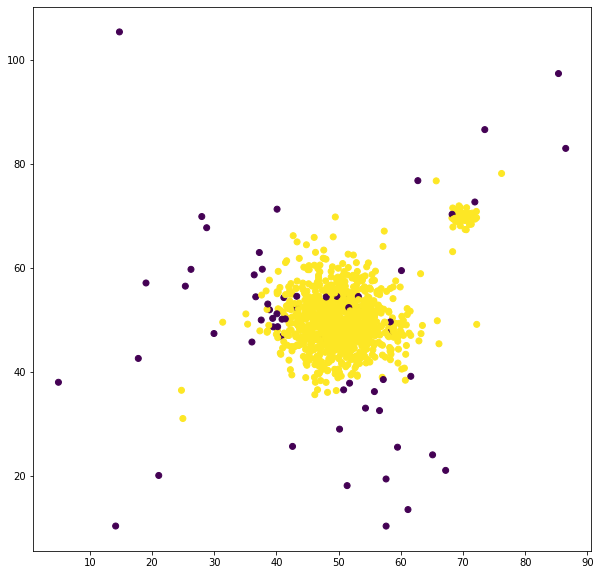

In [57]:
##apply an Isolation forest
outlier_detect = IsolationForest(n_estimators=1, max_samples=1000, contamination=.1, max_features=df.shape[1])
outlier_detect.fit(df)
outliers_predicted = outlier_detect.predict(df)

#check the results
df['outlier'] = outliers_predicted
plt.figure(figsize = (10,10))
plt.scatter(df['v1'], df['v2'], c=df['outlier'])
plt.show()


Even though code block is same but 2 result are different. 

```
# ##apply an Isolation forest
outlier_detect = IsolationForest(n_estimators=1, max_samples=1000, contamination=.1, max_features=df.shape[1])
outlier_detect.fit(df)
outliers_predicted = outlier_detect.predict(df)

#check the results
df['outlier'] = outliers_predicted
plt.figure(figsize = (10,10))
plt.scatter(df['v1'], df['v2'], c=df['outlier'])
plt.show()
```




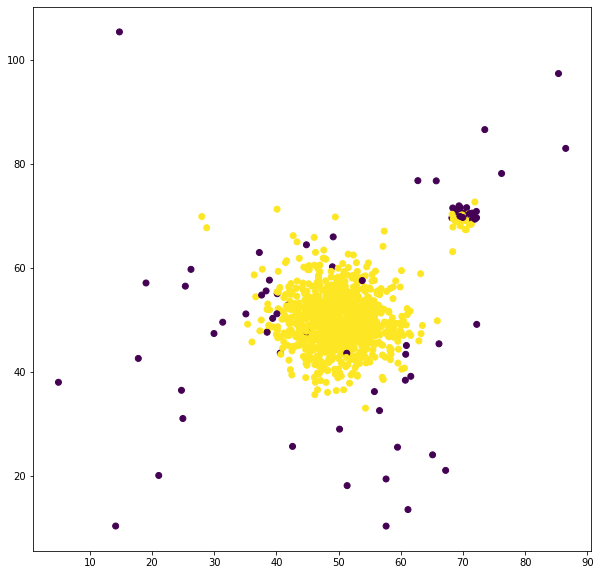

In [59]:
##apply an Isolation forest
outlier_detect = IsolationForest(n_estimators=1, max_samples=1000, contamination=.1, max_features=df.shape[1])
outlier_detect.fit(df)
outliers_predicted = outlier_detect.predict(df)

#check the results
df['outlier'] = outliers_predicted
plt.figure(figsize = (10,10))
plt.scatter(df['v1'], df['v2'], c=df['outlier'])
plt.show()

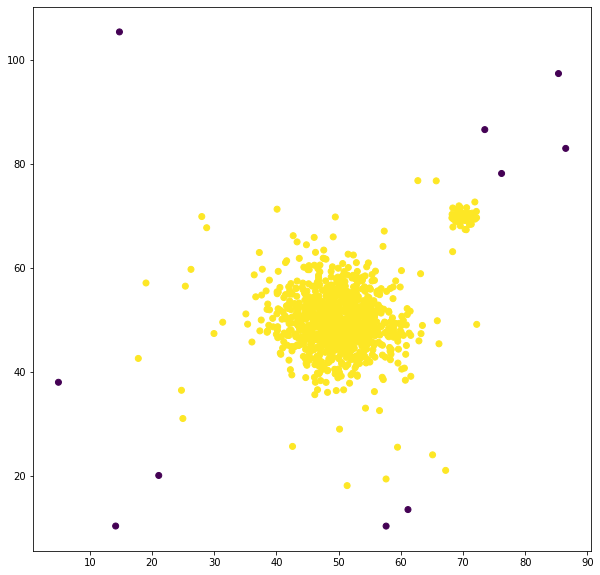

In [63]:
##apply an Isolation forest
outlier_detect = IsolationForest(n_estimators=100, max_samples=1000, contamination=.01, max_features=df.shape[1])
outlier_detect.fit(df)
outliers_predicted = outlier_detect.predict(df)

#check the results
df['outlier'] = outliers_predicted
plt.figure(figsize = (10,10))
plt.scatter(df['v1'], df['v2'], c=df['outlier'])
plt.show()

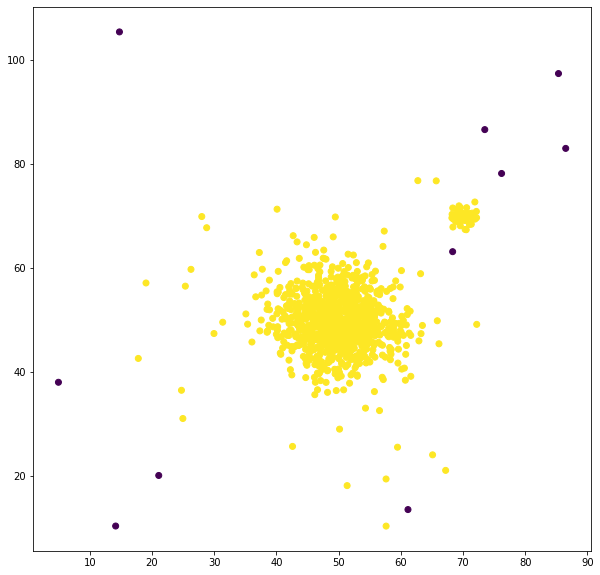

In [65]:
##apply an Isolation forest
outlier_detect = IsolationForest(n_estimators=1000, max_samples=1000, contamination=.01, max_features=df.shape[1])
outlier_detect.fit(df)
outliers_predicted = outlier_detect.predict(df)

#check the results
df['outlier'] = outliers_predicted
plt.figure(figsize = (10,10))
plt.scatter(df['v1'], df['v2'], c=df['outlier'])
plt.show()

**Hyperparameter tuning**
This is how to tune the following parameters for optimal performance:

* n_estimators: The number of decision trees in the forest. According  this [paper by Liu et](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf) al. 100 should be sufficient in most cases.
* max_samples: Given large datasets, you might want to train on random subsets of cases to decrease training time. This parameter lets you determine subset size.
* contamination: The proportion of the data you want to identify as outlier. As demonstrated before, this parameter requires some trial and error combined with scatterplot visualisation, given no prior knowledge.
* max_features: The amount of variables that should be used to define outliers on. Should be set to the amount of variables that you have in almost any situation. This feature allows one to iterate over variables, and do univariate outlier detection on each variable without specifying a standard deviation threshold.

Ref [link](http://www.extended-cognition.com/2018/11/15/multivariate-outlier-detection-with-isolation-forests/)